(intro-panel-model-notebook)=
# Specificare e Interpretare un Modello Longitudinale

In [1]:
source("../_common.R")
suppressPackageStartupMessages({
    library("lavaan")
    library("semPlot")
    library("semTools")
    library("knitr")
    library("markdown")
    library("gridExtra")
})
set.seed(42)

In questo capitolo, esploreremo come specificare e interpretare un modello panel longitudinale tradizionale, un argomento che implica la comprensione di vari aspetti della costruzione del modello. In particolare, discuteremo la struttura simplex, che è comune nei dataset longitudinali, e come affrontare il processo di "potatura" del modello, ossia di semplificazione e ottimizzazione. Inoltre, esamineremo le metodologie per stimare gli effetti indiretti e le strategie per includere le covariate nel modello.

Il termine "modello panel" e "SEM longitudinale" vengono utilizzati qui in modo interscambiabile. Entrambi si concentrano sulle relazioni predittive tra le differenze individuali nei costrutti latenti nel tempo. Tuttavia, è importante notare che il modello panel strutturale non si focalizza sui livelli medi dei costrutti, un'analisi che viene generalmente condotta utilizzando il modello CFA. Il modello panel, quindi, si concentra più sulle relazioni tra le variabili e i loro modelli di covariazione nel tempo.

Nei modelli panel, i livelli medi dei costrutti sono spesso esaminati utilizzando il modello CFA, in particolare quando si specifica un'invarianza fattoriale forte. Questo permette di testare le differenze nei livelli medi senza necessariamente adattare un modello specifico a questi livelli. D'altro canto, i modelli di curva di crescita latente tentano di modellare esplicitamente i livelli medi dei costrutti.

Un aspetto cruciale dei modelli panel longitudinali è che le loro relazioni di regressione predittiva presentano un tono causale. Tuttavia, queste interpretazioni devono essere affrontate con cautela, poiché molti di questi modelli non consentono affermazioni di causalità diretta per via della natura non sperimentale dei dati. La causalità è tuttavia suggerita quando si osservano effetti predittivi affidabili e coerenti nel tempo. In questi modelli, la separazione temporale tra le misurazioni guida la direzione degli effetti predittivi.

È fondamentale ricordare che il modello panel è uno strumento statistico per analizzare i dati e che, per stabilire relazioni di causalità, i dati devono essere raccolti con controlli adeguati e manipolazioni sperimentali rigorose. Solo con dati raccolti in modo appropriato si può specificare il modello statistico corretto per testare ipotesi causali.

Un elemento chiave per un'inferenza valida è il controllo statistico delle variabili confondenti. In questo capitolo, verranno discussi cinque diversi metodi per includere le covariate in un modello e mostreremo come queste possano essere interpretate per dare un senso ai dati analizzati. Questi approcci aiutano a fornire una comprensione più profonda e accurata dei modelli panel e delle loro potenzialità nel fornire intuizioni significative dai dati longitudinali.

## Basi di un Modello Panel

All'inizio della costruzione di un modello panel, la maggior parte delle associazioni non direzionali nel tempo del modello CFA sono trasformate in relazioni di regressione direzionale, ovvero i collegamenti tra i costrutti vengono rimossi o fissati a 0. Le associazioni nel tempo diventano percorsi di regressione (rappresentati da linee con una freccia), stimando così le associazioni longitudinali come effetti unici, controllando tutti gli altri percorsi di regressione specificati. Le associazioni all'interno del tempo rimangono tipicamente come relazioni di covarianza non direzionali (linee curve con doppia freccia).

Nel modello longitudinale, le covarianze tra le variabili al Tempo 1 sono spesso associazioni di ordine zero (cioè, quando non si controllano covariate). Nei tempi successivi, le associazioni all'interno del tempo sono considerate associazioni residue o covarianze tra fattori di disturbo. Un fattore di disturbo è semplicemente la varianza residua di un costrutto dopo aver stimato gli effetti del punto temporale precedente.

La Figura successiva mostra un semplice diagramma di percorso di un modello panel con vari effetti etichettati. In questa figura, un percorso che collega una variabile latente al Tempo 1 con se stessa al Tempo 2 è chiamato percorso autoregressivo. "Regressivo" indica che il percorso è direzionale e predittivo, mentre "auto" significa che il percorso riguarda lo stesso costrutto. I collegamenti longitudinali o nel tempo tra due costrutti sono chiamati effetti incrociati ritardati. Questi termini si riferiscono al fatto che un percorso di regressione passa da un costrutto all'altro, separati da un certo intervallo di tempo. I percorsi incrociati ritardati e autoregressivi sono entrambi effetti predittivi, nei quali si controllano gli effetti di altre stime che portano allo stesso costrutto.

```{figure} ../images/little_fig7_1.png
---
height: 550px
name: little-fig7-1-fig
---
Etichette dei parametri per tre punti temporali con affetto positivo e affetto negativo: Un'analisi di base del modello panel direzionale. Nota. Come sempre, si consente l'associazione delle varianze residue tra gli indicatori corrispondenti nel tempo.  (Figura tratta da {cite:t}`little2023longitudinal`).
```

Con molteplici onde di dati, è possibile stimare un gran numero di relazioni nel tempo. Quando tutti i possibili percorsi di regressione direzionale da un punto temporale precedente a tutti i punti successivi sono stimati, il modello longitudinale è detto saturato. Un modello strutturale saturato generalmente non è molto informativo perché non riflette una rappresentazione parsimoniosa di come le associazioni predittive si sviluppano nel tempo. L'obiettivo di un SEM longitudinale è trovare un insieme ridotto di percorsi strutturali che possano spiegare il modello di associazioni nei dati nel tempo tanto bene quanto il modello saturato. Questo insieme ridotto rappresenta un modello più parsimonioso e teoricamente significativo dei processi che possono sottostare ai dati. Questo modello parsimonioso non dovrebbe differire significativamente dal modello saturo. 

## Il Processo di Cambiamento Simplex

Un modello potenzialmente efficace come punto di partenza per molti modelli panel longitudinali è il modello simplex. Questo modello si basa sull'idea che, se gli individui cambiano a un ritmo costante e le influenze esterne (ambientali o contestuali) su questo tasso di cambiamento sono minime, il pattern di correlazioni da un punto temporale all'altro seguirà un modello simplex. In altre parole, questo pattern è ciò che ci si aspetta quando il cambiamento è costante, risultato di un cambiamento graduale e coerente.

**Esempi di Strutture di Correlazione Simplex**

|         | T1 | T2 | T3 | T4 | T5 | T6 | T7 | T8 |
|---------|---------|---------|---------|---------|---------|---------|---------|---------|
| T1 |    --   |   .800  |   .640  |   .512  |   .410  |   .328  |   .262  |   .210  |
| T2 |   .528  |    --   |   .800  |   .640  |   .512  |   .410  |   .328  |   .262  |
| T3 |   .279  |   .528  |    --   |   .800  |   .640  |   .512  |   .410  |   .328  |
| T4 |   .147  |   .279  |   .528  |    --   |   .800  |   .640  |   .512  |   .410  |
| T5 |   .078  |   .147  |   .279  |   .528  |    --   |   .800  |   .640  |   .512  |
| T6 |   .041  |   .078  |   .147  |   .279  |   .528  |    --   |   .800  |   .640  |
| T7 |   .022  |   .041  |   .078  |   .147  |   .279  |   .528  |    --   |   .800  |
| T8 |   .011  |   .022  |   .041  |   .078  |   .147  |   .279  |   .528  |    --   |

*Nota: Le correlazioni al di sopra della diagonale si basano sull'analogia del mescolamento delle carte con una correlazione autoregressiva di .528. Le correlazioni al di sotto della diagonale sono basate su un coefficiente di stabilità più elevato (.80), indicando una persistenza più forte nel tempo.*

Il modello simplex è semplice ma possiede proprietà note che spesso possono essere utilizzate come aspettative di base per un modello di cambiamento evolutivo, così come per altri costrutti che si ipotizza siano disposti lungo un continuum.

Per comprendere il cambiamento costante e la struttura simplex, si può immaginare un mazzo di carte e una macchina che le mescola perfettamente, tagliando il mazzo esattamente a metà e intercalando le carte una sull'altra. Se si codifica la "posizione" di ogni carta nel mazzo prima della mescolata e poi si correla questa posizione con la posizione ordinata delle carte nel mazzo dopo la mescolata, la correlazione sarebbe di .528. Con una nuova mescolata perfetta, la correlazione tra l'ordine nel secondo e nel terzo mazzo sarebbe ancora di .528. La correlazione tra l'ordine delle carte nel primo e nel terzo mazzo, tuttavia, sarebbe ora di .279, perché sono avvenute due mescolate. Con tre mescolate perfette, la correlazione tra il primo e il quarto mazzo sarebbe ora di .147. Interessante notare che, con questa stabilità di mescolamento, occorrono circa sette mescolate per ritornare a un ordine essenzialmente casuale nel mazzo di carte, dove la correlazione è statisticamente 0.

Nella Tabella precedente è rappresentata la struttura di correlazione simplex per il mazzo di carte dopo sette mescolate. Queste correlazioni sono riportate nel quadrante superiore sopra la diagonale. Nel quadrante inferiore sotto la diagonale, è rappresentata una struttura simplex basata su una relazione di stabilità iniziale molto più forte di .80. Lo scopo di questi due insiemi di correlazioni è dimostrare il "tasso" di riduzione nelle correlazioni nel tempo a seconda del livello di stabilità tra i punti temporali adiacenti e, implicitamente, la lunghezza del tempo che intercorre tra ogni occasione di misurazione.

Se le occasioni di misurazione corrispondono alla velocità della macchina che mescola le carte, il modello di cambiamento stimato catturerebbe accuratamente il tasso di cambiamento indicato dal coefficiente di stabilità di .528. Molti processi di cambiamento evolutivo partono dall'assunzione di un processo di cambiamento costante. Il modello risultante da un tale processo di cambiamento è descritto come una struttura simplex di Guttman, un perfetto o quasi-simplex, o semplicemente una struttura simplex.


```{figure} ../images/little_fig_simplex.png
---
height: 200px
name: little-fig-simplex
---
Stime dei parametri standardizzati dal modello simplex di mazzi di carte mescolati consecutivamente. Nota. Queste stime dei parametri provengono da un modello adattato ai dati nella tabella precedente. Questo modello ha 21 gradi di libertà e un adattamento perfetto del modello. Le correlazioni tra i mazzi separati da più di una mescolata sono riprodotte tracciando i percorsi di regressione tra ciascun mazzo consecutivo. Le linee tratteggiate mostrano le correlazioni riprodotte con l'ordine iniziale del mazzo. (Figura tratta da {cite:t}`little2023longitudinal`).
```

Una struttura simplex può essere intesa come un caso specifico di struttura autoregressiva discreta di primo ordine con ritardo 1, nota come AR1. Questo modello AR1 è soltanto uno dei tanti approcci autoregressivi esplorati nell'ambito della statistica. In un modello AR1, ogni punto dati in una sequenza è correlato direttamente e unicamente con il suo immediato predecessore, il che implica che il valore corrente è influenzato principalmente da quello appena precedente. Per esemplificare, immagina un mazzo di carte: mescolandolo una volta e confrontando l'ordine risultante con quello originale, la correlazione osservata rappresenterebbe un modello AR1. In questo caso, la correlazione dipende principalmente da quanto sono state mescolate le carte rispetto alla loro disposizione iniziale.

D'altra parte, se dopo una o più mescolate, l'ordine delle carte mostra una correlazione con l'ordine originale più alta di quella prevista da un modello AR1, i dati si dicono avere una struttura autoregressiva di secondo ordine (AR2). A differenza dell'AR1, dove ogni valore è legato al suo predecessore immediato, in un modello AR2, il punto dati corrente è influenzato non solo da questo ma anche dal valore che lo precede. Ciò indica che c'è una persistenza o influenza che attraversa più di una fase (o mescolata, nel nostro esempio), suggerendo una correlazione più marcata e duratura nel tempo rispetto a quella di un semplice modello AR1.

Per tornare all'esempio delle carte: se, dopo due mescolate, l'ordine delle carte risulta più vicino all'ordine originale di quanto non si aspetterebbe considerando unicamente l'effetto della prima mescolata (AR1), ciò evidenzia un'influenza AR2. In pratica, questo significa che l'effetto della prima mescolata persiste e continua a influenzare l'ordine delle carte anche dopo la seconda mescolata, risultando in una correlazione più forte tra l'ordine originale e quello finale.

La struttura simplex è probabilmente il modello di cambiamento più comune nelle scienze sociali e comportamentali per valutare gruppi di individui ripetutamente nel tempo. Sebbene vengano dimostrati alcuni modelli longitudinali con una struttura AR2 (e superiore), l'idea di base è che il processo evolutivo di cambiamento nelle scienze sociali e comportamentali sia il processo simplex. Nelle esemplificazioni che seguono, le influenze AR2 vengono interpretate come effetti di contesto dalle occasioni di misurazione che si verificano in due punti temporali. L'interpretazione del contesto è molto ragionevole nelle scienze sociali. Infatti, non è ancora stato visto un esempio di altre strutture autoregressive che non possano essere descritte come un processo simplex con un ulteriore effetto di contesto (o effetti multipli) sovrapposto ad esso. Indipendentemente dalla vera struttura sottostante, i vari modelli statistici descritti in questo capitolo e nei capitoli successivi possono gestire la maggior parte dei processi di cambiamento che potrebbero essere incontrati. Una buona teoria, misurazioni migliori e disegni migliorati aiuteranno a chiarire cosa cambia e come cambia; per ora, si può procedere con poca perdita di generalità.

Esaminiamo qui di seguto l'implementazione del modello Simplex proposta da {cite:t}`little2023longitudinal` per i dati relativi all'esempio del mazzo di carte discusso in precedenza.

In [2]:
tri.corr <- c(
    1, rep(0, 7),
    0.523, 1, rep(0, 6),
    0.279, 0.523, 1, rep(0, 5),
    0.147, 0.279, 0.523, 1, rep(0, 4),
    0.078, 0.147, 0.279, 0.523, 1, rep(0, 3),
    0.041, 0.078, 0.147, 0.279, 0.523, 1, rep(0, 2),
    0.022, 0.041, 0.078, 0.147, 0.279, 0.523, 1, 0,
    0.011, 0.022, 0.041, 0.078, 0.147, 0.279, 0.523, 1
)
upper <- matrix(tri.corr, 8, byrow = FALSE)
lower <- matrix(tri.corr, 8, byrow = TRUE)
mycorr <- upper + lower - diag(8)

rownames(mycorr) <- c("Time1", "Time2", "Time3", "Time4", "Time5", "Time6", "Time7", "Time8")
colnames(mycorr) <- c("Time1", "Time2", "Time3", "Time4", "Time5", "Time6", "Time7", "Time8")
mynob <- 166

mycorr |> print()

      Time1 Time2 Time3 Time4 Time5 Time6 Time7 Time8
Time1 1.000 0.523 0.279 0.147 0.078 0.041 0.022 0.011
Time2 0.523 1.000 0.523 0.279 0.147 0.078 0.041 0.022
Time3 0.279 0.523 1.000 0.523 0.279 0.147 0.078 0.041
Time4 0.147 0.279 0.523 1.000 0.523 0.279 0.147 0.078
Time5 0.078 0.147 0.279 0.523 1.000 0.523 0.279 0.147
Time6 0.041 0.078 0.147 0.279 0.523 1.000 0.523 0.279
Time7 0.022 0.041 0.078 0.147 0.279 0.523 1.000 0.523
Time8 0.011 0.022 0.041 0.078 0.147 0.279 0.523 1.000


In [3]:
mod6.2 <- "
    Time2 ~ Time1
    Time3 ~ Time2
    Time4 ~ Time3
    Time5 ~ Time4
    Time6 ~ Time5
    Time7 ~ Time6
    Time8 ~ Time7

    Time1 ~~ Time1
    Time2 ~~ Time2
    Time3 ~~ Time3
    Time4 ~~ Time4
    Time5 ~~ Time5
    Time6 ~~ Time6
    Time7 ~~ Time7
    Time8 ~~ Time8
"

In [4]:
fit6.2 <- lavaan(mod6.2, sample.cov = mycorr, sample.nobs = mynob, fixed.x = FALSE)

In [5]:
summary(fit6.2, fit.measures = TRUE) |> print()

lavaan 0.6.17 ended normally after 7 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        15

  Number of observations                           166

Model Test User Model:
                                                      
  Test statistic                                 0.062
  Degrees of freedom                                21
  P-value (Chi-square)                           1.000

Model Test Baseline Model:

  Test statistic                               371.387
  Degrees of freedom                                28
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    1.000
  Tucker-Lewis Index (TLI)                       1.081

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -1694.676
  Loglikelihood unrestricted model (H1)      -169

In [6]:
dat <- read.table(
    file = "../data/grade7and8.long.823.dat",
    col.names = c(
        "PAT1P1", "PAT1P2", "PAT1P3", "NAT1P1", "NAT1P2", "NAT1P3",
        "PAT2P1", "PAT2P2", "PAT2P3", "NAT2P1", "NAT2P2", "NAT2P3",
        "PAT3P1", "PAT3P2", "PAT3P3", "NAT3P1", "NAT3P2", "NAT3P3",
        "grade", "female", "black", "hispanic", "other"
    )
)

In [7]:
psych::describe(dat[, 1:18])

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PAT1P1,1,823,2.991885,0.7644692,3.00000,3.042751,0.7413000,1,4,3,-0.4591316,-0.3486015,0.02664772
PAT1P2,2,823,2.895543,0.7471531,3.00000,2.919860,0.7413000,1,4,3,-0.2986814,-0.3732379,0.02604412
PAT1P3,3,823,3.112289,0.7481646,3.00000,3.175932,0.7413000,1,4,3,-0.5761073,-0.2344880,0.02607938
NAT1P1,4,823,1.706311,0.7057569,1.50000,1.596773,0.7413000,1,4,3,1.2112142,1.2584152,0.02460114
NAT1P2,5,823,1.450148,0.6576346,1.00000,1.312657,0.0000000,1,4,3,1.7700996,3.1319596,0.02292370
NAT1P3,6,823,1.453063,0.6678318,1.00000,1.311948,0.0000000,1,4,3,1.8185647,3.3558790,0.02327915
PAT2P1,7,823,3.001628,0.7599034,3.00000,3.044683,0.7413000,1,4,3,-0.4055187,-0.5083138,0.02648857
PAT2P2,8,823,2.909043,0.7491414,3.00000,2.936239,0.7413000,1,4,3,-0.2667719,-0.5077469,0.02611343
PAT2P3,9,823,3.126799,0.7295410,3.09211,3.189561,0.8778623,1,4,3,-0.6282730,-0.1499079,0.02543020


Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


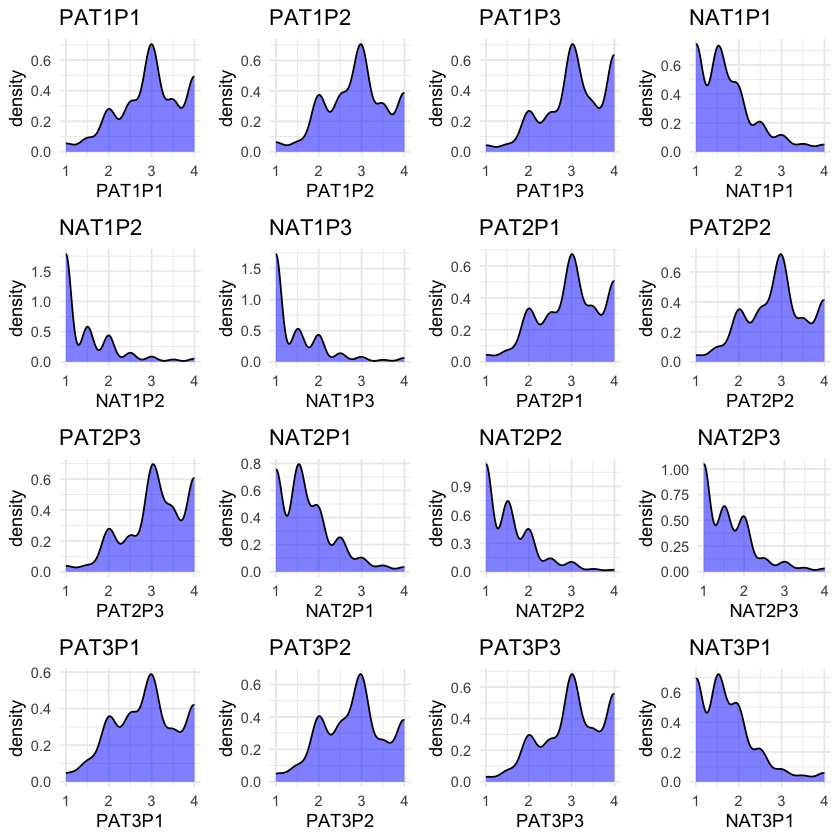

In [8]:
plots_list <- list()

for (i in 1:16) {
    p <- ggplot(dat, aes_string(x = names(dat)[i])) +
        geom_density(fill = "blue", color = "black", alpha = 0.5) +
        theme_minimal() +
        ggtitle(paste(names(dat)[i]))
    plots_list[[i]] <- p
}

# Organizza e visualizza i grafici
do.call(grid.arrange, c(plots_list, ncol = 4))

In [9]:
mod_null <- "
    PAT1P1 ~~ V1*PAT1P1
    PAT1P2 ~~ V2*PAT1P2
    PAT1P3 ~~ V3*PAT1P3
    NAT1P1 ~~ V4*NAT1P1
    NAT1P2 ~~ V5*NAT1P2
    NAT1P3 ~~ V6*NAT1P3

    PAT2P1 ~~ V1*PAT2P1
    PAT2P2 ~~ V2*PAT2P2
    PAT2P3 ~~ V3*PAT2P3
    NAT2P1 ~~ V4*NAT2P1
    NAT2P2 ~~ V5*NAT2P2
    NAT2P3 ~~ V6*NAT2P3

    PAT3P1 ~~ V1*PAT3P1
    PAT3P2 ~~ V2*PAT3P2
    PAT3P3 ~~ V3*PAT3P3
    NAT3P1 ~~ V4*NAT3P1
    NAT3P2 ~~ V5*NAT3P2
    NAT3P3 ~~ V6*NAT3P3

	PAT1P1 ~ T1*1
    PAT1P2 ~ T2*1
    PAT1P3 ~ T3*1
    NAT1P1 ~ T4*1
    NAT1P2 ~ T5*1
    NAT1P3 ~ T6*1

    PAT2P1 ~ T1*1
    PAT2P2 ~ T2*1
    PAT2P3 ~ T3*1
    NAT2P1 ~ T4*1
    NAT2P2 ~ T5*1
    NAT2P3 ~ T6*1

    PAT3P1 ~ T1*1
    PAT3P2 ~ T2*1
    PAT3P3 ~ T3*1
    NAT3P1 ~ T4*1
    NAT3P2 ~ T5*1
    NAT3P3 ~ T6*1
"

Il modello nullo o di base è usato come punto di partenza nell'analisi SEM e per confronti con modelli più complessi. Il modello nullo specifica sei variabili osservate (PAT1P1, PAT1P2, PAT1P3, NAT1P1, NAT1P2, NAT1P3) misurate in tre punti temporali distinti. Questo implica che ci sono 18 variabili osservate in totale. Ogni variabile osservata ha la propria varianza unica che è stimata nel modello. Le medie delle 6 variabili misurate in ciascuno dei tre punti temporali sono assunte non variare in funzione del tempo. Nonostante il modello prenda in considerazione misurazioni ripetute nel tempo, non vi è alcuna specificazione di correlazioni o percorsi causali tra queste misure nel tempo, come sarebbe tipico per i modelli longitudinali. Essendo un modello nullo, non vengono specificate relazioni tra le variabili (varianze e medie) diverse dai loro effetti unici. 

In [10]:
fit_null <- lavaan(mod_null, data = dat, orthogonal = TRUE)

In [11]:
summary(fit_null, standardized = T, fit.measures = TRUE) |> print()

lavaan 0.6.17 ended normally after 32 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        36
  Number of equality constraints                    24

  Number of observations                           823

Model Test User Model:
                                                       
  Test statistic                              11213.103
  Degrees of freedom                                177
  P-value (Chi-square)                            0.000

Model Test Baseline Model:

  Test statistic                             11131.067
  Degrees of freedom                               153
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.000
  Tucker-Lewis Index (TLI)                       0.131

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)             

Modello SEM iniziale.  

Il modello SEM iniziale presentato da {cite:t}`little2023longitudinal` definisce sei variabili latenti (Pos1, Pos2, Pos3, Neg1, Neg2, Neg3) che rappresentano costrutti psicologici positivi e negativi misurati in tre diversi momenti temporali. Ogni variabile latente è misurata da tre indicatori (per esempio, Pos1 è misurata da PAT1P1, PAT1P2, PAT1P3), con coefficienti di carico (L1, L2, L3, ecc.) che quantificano la relazione tra le variabili latenti e i loro indicatori. Il modello stima la varianza di ciascuna variabile latente e la covarianza tra variabili latenti diverse. Le medie delle variabili latenti sono impostate a 1, indicando che sono considerate fisse. Il modello include stime per la varianza e la covarianza degli indicatori attraverso il tempo, suggerendo l'esistenza di correlazioni temporali tra gli stessi indicatori misurati in momenti diversi. Ci sono percorsi di regressione che collegano le variabili latenti nel tempo (ad esempio, Pos2 è influenzata da Pos1). Il modello impone alcuni vincoli sulle cariche fattoriali e sugli intercetti degli indicatori.

Tale modello mira a esplorare le relazioni dinamiche e temporali tra variabili latenti, diversamente da un modello di invarianza configurale, che è più orientato alla valutazione della costanza della struttura fattoriale.

In [12]:
SEMmod <- "
    Pos1 =~ L1*PAT1P1 + L2*PAT1P2 + L3*PAT1P3
    Neg1 =~ L4*NAT1P1 + L5*NAT1P2 + L6*NAT1P3
    Pos2 =~ L1*PAT2P1 + L2*PAT2P2 + L3*PAT2P3
    Neg2 =~ L4*NAT2P1 + L5*NAT2P2 + L6*NAT2P3
    Pos3 =~ L1*PAT3P1 + L2*PAT3P2 + L3*PAT3P3
    Neg3 =~ L4*NAT3P1 + L5*NAT3P2 + L6*NAT3P3

    ## Latent factor variance and covariance (Psi matrix)
    Pos1 ~~ Pos1 ##Psi 1,1
    Pos1 ~~ Neg1 ##Psi 1,2
    Neg1 ~~ Neg1 ##Psi 2,2

    Pos2 ~~ Pos2 ##Psi 3,3
    Pos2 ~~ Neg2 ##Psi 3,4
    Neg2 ~~ Neg2 ##Psi 4,4

    Pos3 ~~ Pos3  ##Psi 5,5
    Pos3 ~~ Neg3  ##Psi 5,6
    Neg3 ~~ Neg3  ##Psi 6,6

    ## Latent means (Alpha matrix)
    Pos1 ~ 1
    Neg1 ~ 1
    Pos2 ~ 1
    Neg2 ~ 1
    Pos3 ~ 1
    Neg3 ~ 1

    ## indicator resduals var-covar (Theta-Epsilon matrix)
    ## Time1
    PAT1P1 ~~ PAT1P1
    PAT1P1 ~~ PAT2P1
    PAT1P1 ~~ PAT3P1

    PAT1P2 ~~ PAT1P2
    PAT1P2 ~~ PAT2P2
    PAT1P2 ~~ PAT3P2

    PAT1P3 ~~ PAT1P3
    PAT1P3 ~~ PAT2P3
    PAT1P3 ~~ PAT3P3

    NAT1P1 ~~ NAT1P1
    NAT1P1 ~~ NAT2P1
    NAT1P1 ~~ NAT3P1

    NAT1P2 ~~ NAT1P2
    NAT1P2 ~~ NAT2P2
    NAT1P2 ~~ NAT3P2

    NAT1P3 ~~ NAT1P3
    NAT1P3 ~~ NAT2P3
    NAT1P3 ~~ NAT3P3

    #Time2
    PAT2P1 ~~ PAT2P1
    PAT2P1 ~~ PAT3P1

    PAT2P2 ~~ PAT2P2
    PAT2P2 ~~ PAT3P2

    PAT2P3 ~~ PAT2P3
    PAT2P3 ~~ PAT3P3

    NAT2P1 ~~ NAT2P1
    NAT2P1 ~~ NAT3P1

    NAT2P2 ~~ NAT2P2
    NAT2P2 ~~ NAT3P2

    NAT2P3 ~~ NAT2P3
    NAT2P3 ~~ NAT3P3

    ## Time3
    PAT3P1  ~~ PAT3P1
    PAT3P2 ~~ PAT3P2
    PAT3P3 ~~ PAT3P3
    NAT3P1 ~~ NAT3P1
    NAT3P2 ~~ NAT3P2
    NAT3P3 ~~ NAT3P3

    ##Indicator means/intercepts (Tau vector)
    PAT1P1 ~ t1*1
    PAT1P2 ~ t2*1
    PAT1P3 ~ t3*1
    NAT1P1 ~ t4*1
    NAT1P2 ~ t5*1
    NAT1P3 ~ t6*1

    PAT2P1 ~ t1*1
    PAT2P2 ~ t2*1
    PAT2P3 ~ t3*1
    NAT2P1 ~ t4*1
    NAT2P2 ~ t5*1
    NAT2P3 ~ t6*1

    PAT3P1 ~ t1*1
    PAT3P2 ~ t2*1
    PAT3P3 ~ t3*1
    NAT3P1 ~ t4*1
    NAT3P2 ~ t5*1
    NAT3P3 ~ t6*1

    ##Regression paths here
    Pos2 ~ Pos1
    Pos3 ~ Pos1 + Pos2
    Neg2 ~ Neg1
    Neg3 ~ Neg1 + Neg2

    ## Constraints
    L1 == 3 - L2 - L3
    L4 == 3 - L5 - L6
    t1 == 0 - t2 - t3
    t4 == 0 - t5 - t6
"

In [13]:
fitSEM <- lavaan(SEMmod, data = dat, meanstructure = TRUE)

In [14]:
summary(fitSEM, standardized = TRUE, fit.measures = TRUE) |> print()

lavaan 0.6.17 ended normally after 129 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        93
  Number of equality constraints                    28

  Number of observations                           823

Model Test User Model:
                                                      
  Test statistic                               441.520
  Degrees of freedom                               124
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                             11131.067
  Degrees of freedom                               153
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.971
  Tucker-Lewis Index (TLI)                       0.964

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)             -10

Modello di invarianza configurale. In un modello di invarianza configurale, ci si aspetta che la struttura fattoriale, cioè il numero di fattori e il pattern di carichi fattoriali, sia la stessa in tutti i gruppi o momenti temporali considerati. 

Ogni variabile latente (Pos1, Pos2, Pos3, Neg1, Neg2, Neg3) è misurata da un set specifico di indicatori in ciascuno dei tre momenti temporali. Ad esempio, Pos1 è misurata da PAT1P1, PAT1P2, e PAT1P3. I carichi fattoriali (L1, L2, L3, ecc.) sono specificati separatamente per ogni momento temporale. I vincoli imposti (ad esempio, L1 == 3 - L2 - L3) indicano che ci sono alcune restrizioni nella relazione tra i carichi fattoriali. Questi vincoli sono utilizzati per testare l'uguaglianza dei carichi attraverso i diversi tempi. 

Il modello stima separatamente la varianza di ciascun indicatore e di ciascuna variabile latente in ogni momento temporale. Il modello include covarianze sia tra gli indicatori in diversi momenti temporali sia tra le variabili latenti, suggerendo che esiste una correlazione tra le misurazioni nel tempo.  Le medie delle variabili latenti e degli indicatori sono specificate, con alcuni vincoli imposti anche su di esse (ad esempio, t1 == 0 - t2 - t3).

I vincoli imposti sui carichi fattoriali e sulle medie degli indicatori permettono di testare se la struttura fattoriale è consistente nel tempo, che è l'essenza dell'invarianza configurale. 

In [15]:
mod_config <- "
    Pos1 =~ L1*PAT1P1 + L2*PAT1P2 + L3*PAT1P3
    Neg1 =~ L4*NAT1P1 + L5*NAT1P2 + L6*NAT1P3
    Pos2 =~ L7*PAT2P1 + L8*PAT2P2 + L9*PAT2P3
    Neg2 =~ L10*NAT2P1 + L11*NAT2P2 + L12*NAT2P3
    Pos3 =~ L13*PAT3P1 + L14*PAT3P2 + L15*PAT3P3
    Neg3 =~ L16*NAT3P1 + L17*NAT3P2 + L18*NAT3P3
    L1 == 3 - L2 - L3
    L4 == 3 - L5 - L6
    L7 == 3 - L8 - L9
    L10== 3 - L11- L12
    L13== 3 - L14- L15
    L16== 3 - L17- L18

    PAT1P1~~PAT1P1
    PAT1P2~~PAT1P2
    PAT1P3~~PAT1P3
    NAT1P1~~NAT1P1
    NAT1P2~~NAT1P2
    NAT1P3~~NAT1P3
    PAT2P1~~PAT2P1
    PAT2P2~~PAT2P2
    PAT2P3~~PAT2P3
    NAT2P1~~NAT2P1
    NAT2P2~~NAT2P2
    NAT2P3~~NAT2P3
    PAT3P1~~PAT3P1
    PAT3P2~~PAT3P2
    PAT3P3~~PAT3P3
    NAT3P1~~NAT3P1
    NAT3P2~~NAT3P2
    NAT3P3~~NAT3P3

    Pos1~~Pos1
    Neg1~~Neg1
    Pos2~~Pos2
    Neg2~~Neg2
    Pos3~~Pos3
    Neg3~~Neg3

    PAT1P1~~PAT2P1 + PAT3P1
    PAT2P1~~PAT3P1
    PAT1P2~~PAT2P2 + PAT3P2
    PAT2P2~~PAT3P2
    PAT1P3~~PAT2P3 + PAT3P3
    PAT2P3~~PAT3P3
    NAT1P1~~NAT2P1 + NAT3P1
    NAT2P1~~NAT3P1
    NAT1P2~~NAT2P2 + NAT3P2
    NAT2P2~~NAT3P2
    NAT1P3~~NAT2P3 + NAT3P3
    NAT2P3~~NAT3P3

    Pos1~~Pos2 + Pos3 + Neg1 + Neg2 + Neg3
    Pos2~~Pos3 + Neg1 + Neg2 + Neg3
    Pos3~~Neg1 + Neg2 + Neg3
    Neg1~~Neg2 + Neg3
    Neg2~~Neg3

    Pos1~NA*1
    Neg1~NA*1
    Pos2~NA*1
    Neg2~NA*1
    Pos3~NA*1
    Neg3~NA*1

    PAT1P1~t1*1
    PAT1P2~t2*1
    PAT1P3~t3*1
    NAT1P1~t4*1
    NAT1P2~t5*1
    NAT1P3~t6*1
    PAT2P1~t7*1
    PAT2P2~t8*1
    PAT2P3~t9*1
    NAT2P1~t10*1
    NAT2P2~t11*1
    NAT2P3~t12*1
    PAT3P1~t13*1
    PAT3P2~t14*1
    PAT3P3~t15*1
    NAT3P1~t16*1
    NAT3P2~t17*1
    NAT3P3~t18*1

    t1 == 0 - t2 - t3
    t4 == 0 - t5 - t6
    t7 == 0 - t8 - t9
    t10== 0 - t11- t12
    t13== 0 - t14- t15
    t16== 0 - t17- t18
"

In [16]:
fit_config <- lavaan(mod_config, data = dat, meanstructure = TRUE)

In [17]:
summary(fit_config, standardized = TRUE, fit.measures = TRUE) |> print()

lavaan 0.6.17 ended normally after 160 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        99
  Number of equality constraints                    12

  Number of observations                           823

Model Test User Model:
                                                      
  Test statistic                               352.232
  Degrees of freedom                               102
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                             11131.067
  Degrees of freedom                               153
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.977
  Tucker-Lewis Index (TLI)                       0.966

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)             -10

Il modello di invarianza debole, anche conosciuto come invarianza metrica, è un passo oltre l'invarianza configurale nella SEM per testare l'uguaglianza di costrutti psicologici nel tempo. Mentre l'invarianza configurale si concentra sulla struttura fattoriale (cioè, la presenza e il pattern dei carichi fattoriali), l'invarianza debole si spinge ulteriormente per testare se i carichi fattoriali stessi sono uguali nei diversi momenti temporali.

Nel modello successivo, i carichi fattoriali per gli indicatori corrispondenti sono mantenuti uguali attraverso i diversi tempi. Ad esempio, L1 è utilizzato per PAT1P1, PAT2P1 e PAT3P1 in tutti e tre i momenti temporali. Questo significa che si sta testando se la relazione tra le variabili latenti (Pos e Neg) e i loro indicatori (PAT e NAT) è la stessa nel tempo.

Il modello stima separatamente la varianza di ciascun indicatore e di ciascuna variabile latente in ogni momento temporale. Questo è simile all'invarianza configurale.

Il modello include covarianze sia tra gli indicatori in diversi momenti temporali sia tra le variabili latenti, permettendo di catturare la correlazione tra le misurazioni nel tempo.

Viene fatta un'ipotesi sulle medie degli indicatori, come mostrato nelle equazioni `PAT1P1 ~ t1*1`, ecc. I vincoli sulle medie degli indicatori (ad esempio, `t1 == 0 - t2 - t3`) suggeriscono che ci sono alcune restrizioni matematiche imposte sulle medie degli indicatori.  Prendendo l'equazione `t1 == 0 - t2 - t3` come esempio, questa impone una relazione diretta tra tre medie degli indicatori. In pratica, afferma che la media di un indicatore (rappresentata da `t1`) è definita come l'opposto della somma delle medie di altri due indicatori (`t2` e `t3`). Questo tipo di vincolo può essere interpretato come un meccanismo di bilanciamento. Se `t2` e `t3` aumentano, allora `t1` diminuisce di conseguenza, mantenendo una relazione bilanciata tra queste tre medie.

Mentre l'invarianza configurale richiede solo che la stessa struttura fattoriale sia presente attraverso i gruppi o nel tempo (ad esempio, gli stessi fattori con gli stessi indicatori), l'invarianza debole richiede anche che i carichi fattoriali siano gli stessi. Questo è un test più rigoroso dell'invarianza poiché non solo assume che le stesse variabili latenti siano misurate, ma anche che la forza della relazione tra le variabili latenti e i loro indicatori sia costante.

In [18]:
mod_weak <- "
	Pos1 =~ L1*PAT1P1 + L2*PAT1P2 + L3*PAT1P3
	Neg1 =~ L4*NAT1P1 + L5*NAT1P2 + L6*NAT1P3
	Pos2 =~ L1*PAT2P1 + L2*PAT2P2 + L3*PAT2P3
	Neg2 =~ L4*NAT2P1 + L5*NAT2P2 + L6*NAT2P3
	Pos3 =~ L1*PAT3P1 + L2*PAT3P2 + L3*PAT3P3
	Neg3 =~ L4*NAT3P1 + L5*NAT3P2 + L6*NAT3P3

	## indicator residual variances (Theta-Epsilon matrix)
	PAT1P1 ~~ PAT1P1
	PAT1P2 ~~ PAT1P2
	PAT1P3 ~~ PAT1P3
	NAT1P1 ~~ NAT1P1
	NAT1P2 ~~ NAT1P2
	NAT1P3 ~~ NAT1P3
	PAT2P1 ~~ PAT2P1
	PAT2P2 ~~ PAT2P2
	PAT2P3 ~~ PAT2P3
	NAT2P1 ~~ NAT2P1
	NAT2P2 ~~ NAT2P2
	NAT2P3 ~~ NAT2P3
	PAT3P1 ~~ PAT3P1
	PAT3P2 ~~ PAT3P2
	PAT3P3 ~~ PAT3P3
	NAT3P1 ~~ NAT3P1
	NAT3P2 ~~ NAT3P2
	NAT3P3 ~~ NAT3P3

	### cross-time correlated residuals
	## correlate residuals of indicators with themselves across time
	PAT1P1 ~~ PAT2P1 + PAT3P1
	PAT2P1 ~~ PAT3P1
	PAT1P2 ~~ PAT2P2 + PAT3P2
	PAT2P2 ~~ PAT3P2
	PAT1P3 ~~ PAT2P3 + PAT3P3
	PAT2P3 ~~ PAT3P3
	NAT1P1 ~~ NAT2P1 + NAT3P1
	NAT2P1 ~~ NAT3P1
	NAT1P2 ~~ NAT2P2 + NAT3P2
	NAT2P2 ~~ NAT3P2
	NAT1P3 ~~ NAT2P3 + NAT3P3
	NAT2P3 ~~ NAT3P3

	## indicator intercepts (Tau vector), include labels for model constraints
	PAT1P1 ~ t1*1
	PAT1P2 ~ t2*1
	PAT1P3 ~ t3*1
	NAT1P1 ~ t4*1
	NAT1P2 ~ t5*1
	NAT1P3 ~ t6*1

	PAT2P1 ~ t7*1
	PAT2P2 ~ t8*1
	PAT2P3 ~ t9*1
	NAT2P1 ~ t10*1
	NAT2P2 ~ t11*1
	NAT2P3 ~ t12*1

	PAT3P1 ~ t13*1
	PAT3P2 ~ t14*1
	PAT3P3 ~ t15*1
	NAT3P1 ~ t16*1
	NAT3P2 ~ t17*1
	NAT3P3 ~ t18*1

	### latent factor variance (Psi matrix)
	Pos1 ~~ Pos1
	Neg1 ~~ Neg1
	Pos2 ~~ Pos2
	Neg2 ~~ Neg2
	Pos3 ~~ Pos3
	Neg3 ~~ Neg3

	### factor covariance
	Pos1 ~~ Pos2 + Pos3 + Neg1 + Neg2 + Neg3
	Pos2 ~~ Pos3 + Neg1 + Neg2 + Neg3
	Pos3 ~~ Neg1 + Neg2 + Neg3
	Neg1 ~~ Neg2 + Neg3
	Neg2 ~~ Neg3

	## latent means (Alpha matrix)
	Pos1 ~ 1
	Neg1 ~ 1
	Pos2 ~ 1
	Neg2 ~ 1
	Pos3 ~ 1
	Neg3 ~ 1

	## model constraints
	L1 == 3 - L2 - L3
	L4 == 3 - L5 - L6
	t1 == 0 - t2 - t3
	t4 == 0 - t5 - t6
	t7 == 0 - t8 - t9
	t10 == 0 - t11 - t12
	t13 == 0 - t14 - t15
	t16 == 0 - t17 - t18
"

In [19]:
fit_wk <- lavaan(mod_weak, data = dat, meanstructure = TRUE)
#### Did not converge on first run, used final estimates on starting values for next run
fit_weak <- lavaan(mod_weak, data = dat, meanstructure = TRUE, start = fit_wk)

In [20]:
summary(fit_weak, standardized = TRUE, fit.measures = TRUE) |> print()

lavaan 0.6.17 ended normally after 4 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        99
  Number of equality constraints                    20

  Number of observations                           823

Model Test User Model:
                                                      
  Test statistic                               366.562
  Degrees of freedom                               110
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                             11131.067
  Degrees of freedom                               153
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.977
  Tucker-Lewis Index (TLI)                       0.967

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)             -1055

Il modello di invarianza forte è un passaggio ulteriore nell'analisi dell'invarianza in un contesto di modellazione SEM longitudinale. Mentre l'invarianza configurale si concentra sulla struttura fattoriale e l'invarianza debole aggiunge l'uguaglianza dei carichi fattoriali, l'invarianza forte va oltre per includere anche l'uguaglianza delle medie degli indicatori.

Come nei modelli di invarianza debole, i carichi fattoriali (L1, L2, L3, L4, L5, L6) sono mantenuti uguali attraverso i diversi momenti temporali, indicando che la forza della relazione tra le variabili latenti e i loro indicatori è costante.

Il modello impone che le medie degli indicatori siano uguali attraverso i diversi momenti temporali. Questo è indicato dalle equazioni come `PAT1P1 ~ t1*1`, `PAT2P1 ~ t1*1`, e `PAT3P1 ~ t1*1`, dove `t1` è lo stesso in tutti e tre i momenti temporali. 

Il modello continua a stimare separatamente la varianza degli indicatori e la covarianza sia tra gli indicatori in diversi momenti temporali sia tra le variabili latenti.

Sono imposti alcuni vincoli, come `t1 == 0 - t2 - t3`, che servono a identificare il modello e riflettono ipotesi teoriche sulle relazioni tra gli indicatori.

L'invarianza forte è fondamentale per garantire che le misure di un costrutto siano completamente comparabili nel tempo o tra i gruppi. Se un modello dimostra invarianza forte, significa che non solo la relazione tra le variabili latenti e i loro indicatori è costante, ma anche che il livello di base di ciascun indicatore è lo stesso. Questo è cruciale per confronti delle medie latenti o per esaminare i cambiamenti nel tempo.

In [21]:
mod_strong <- "
	### loadings
	Pos1 =~ L1*PAT1P1 + L2*PAT1P2 + L3*PAT1P3
	Neg1 =~ L4*NAT1P1 + L5*NAT1P2 + L6*NAT1P3
	Pos2 =~ L1*PAT2P1 + L2*PAT2P2 + L3*PAT2P3
	Neg2 =~ L4*NAT2P1 + L5*NAT2P2 + L6*NAT2P3
	Pos3 =~ L1*PAT3P1 + L2*PAT3P2 + L3*PAT3P3
	Neg3 =~ L4*NAT3P1 + L5*NAT3P2 + L6*NAT3P3
	L1 == 3 - L2 - L3
	L4 == 3 - L5 - L6

	### factor variance
	Pos1 ~~ Pos1
	Neg1 ~~ Neg1
	Pos2 ~~ Pos2
	Neg2 ~~ Neg2
	Pos3 ~~ Pos3
	Neg3 ~~ Neg3

	### factor covariance
	Pos1 ~~ Pos2 + Pos3 + Neg1 + Neg2 + Neg3
	Pos2 ~~ Pos3 + Neg1 + Neg2 + Neg3
	Pos3 ~~ Neg1 + Neg2 + Neg3
	Neg1 ~~ Neg2 + Neg3
	Neg2 ~~ Neg3

	### residual variance
	PAT1P1 ~~ PAT1P1
	PAT1P2 ~~ PAT1P2
	PAT1P3 ~~ PAT1P3
	NAT1P1 ~~ NAT1P1
	NAT1P2 ~~ NAT1P2
	NAT1P3 ~~ NAT1P3
	PAT2P1 ~~ PAT2P1
	PAT2P2 ~~ PAT2P2
	PAT2P3 ~~ PAT2P3
	NAT2P1 ~~ NAT2P1
	NAT2P2 ~~ NAT2P2
	NAT2P3 ~~ NAT2P3
	PAT3P1 ~~ PAT3P1
	PAT3P2 ~~ PAT3P2
	PAT3P3 ~~ PAT3P3
	NAT3P1 ~~ NAT3P1
	NAT3P2 ~~ NAT3P2
	NAT3P3 ~~ NAT3P3

	### cross-time correlated residuals
	PAT1P1 ~~ PAT2P1 + PAT3P1
	PAT2P1 ~~ PAT3P1
	PAT1P2 ~~ PAT2P2 + PAT3P2
	PAT2P2 ~~ PAT3P2
	PAT1P3 ~~ PAT2P3 + PAT3P3
	PAT2P3 ~~ PAT3P3
	NAT1P1 ~~ NAT2P1 + NAT3P1
	NAT2P1 ~~ NAT3P1
	NAT1P2 ~~ NAT2P2 + NAT3P2
	NAT2P2 ~~ NAT3P2
	NAT1P3 ~~ NAT2P3 + NAT3P3
	NAT2P3 ~~ NAT3P3

	## latent mean
	Pos1 ~ 1
	Neg1 ~ 1
	Pos2 ~ 1
	Neg2 ~ 1
	Pos3 ~ 1
	Neg3 ~ 1

	## intercept
	PAT1P1 ~ t1*1
	PAT1P2 ~ t2*1
	PAT1P3 ~ t3*1
	NAT1P1 ~ t4*1
	NAT1P2 ~ t5*1
	NAT1P3 ~ t6*1
	PAT2P1 ~ t1*1
	PAT2P2 ~ t2*1
	PAT2P3 ~ t3*1
	NAT2P1 ~ t4*1
	NAT2P2 ~ t5*1
	NAT2P3 ~ t6*1
	PAT3P1 ~ t1*1
	PAT3P2 ~ t2*1
	PAT3P3 ~ t3*1
	NAT3P1 ~ t4*1
	NAT3P2 ~ t5*1
	NAT3P3 ~ t6*1

	t1 == 0 - t2 - t3
	t4 == 0 - t5 - t6
	"

In [22]:
fit_strong <- lavaan(mod_strong, data = dat, meanstructure = TRUE)

In [23]:
summary(fit_strong, standardized = TRUE, fit.measures = TRUE) |> print()

lavaan 0.6.17 ended normally after 148 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        99
  Number of equality constraints                    28

  Number of observations                           823

Model Test User Model:
                                                      
  Test statistic                               418.737
  Degrees of freedom                               118
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                             11131.067
  Degrees of freedom                               153
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.973
  Tucker-Lewis Index (TLI)                       0.964

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)             -10

Un confronto tra i modelli precedenti può essere eseguito mediante il test del rapporto tra verosimiglianze.

In [24]:
out <- compareFit(fit_null, fitSEM, fit_config, fit_weak, fit_strong)
summary(out) |> 
    print()

################### Nested Model Comparison #########################

Chi-Squared Difference Test

            Df   AIC   BIC    Chisq Chisq diff   RMSEA Df diff Pr(>Chisq)    
fit_config 102 21263 21673   352.23                                          
fit_weak   110 21262 21634   366.56       14.3 0.03101       8  0.0735478 .  
fit_strong 118 21298 21633   418.74       52.2 0.08191       8  1.557e-08 ***
fitSEM     124 21309 21615   441.52       22.8 0.05830       6  0.0008723 ***
fit_null   177 31974 32031 11213.10    10771.6 0.49571      53  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

####################### Model Fit Indices ###########################
                chisq  df pvalue rmsea   cfi   tli  srmr        aic        bic
fit_config   352.232† 102   .000 .055  .977† .966  .035  21263.420  21673.447 
fit_weak     366.562  110   .000 .053† .977  .967† .035† 21261.750† 21634.074 
fit_strong   418.737  118   .000 .056  .973  .964  .037  

I valori di `Chisq` indicano il grado di adattamento dei modelli ai dati. Valori più bassi indicano un migliore adattamento. Dall'elenco, `fit_config` ha il valore di Chi-square più basso, suggerendo il miglior adattamento tra i modelli confrontati. Un valore di `Chisq diff` significativo (basso valore p) suggerisce che il modello più vincolato ha un adattamento significativamente peggiore.`Chisq diff` di 14.3 con un valore p di 0.0735 indica che non c'è una differenza statisticamente significativa nel fit tra i modelli configurale e debole. Questo suggerisce che l'aggiunta dell'invarianza debole (uguaglianza dei carichi fattoriali) non peggiora significativamente il fit.
`Chisq diff` è 52.2 con un valore p molto basso (1.557e-08), indica che l'aggiunta dell'invarianza forte (uguaglianza delle medie) peggiora significativamente il fit rispetto al modello debole.
Una differenza di 22.8 nel Chi-square e un valore p basso (0.0008723) suggeriscono che il modello forte ha un fit significativamente peggiore rispetto al modello SEM base. Il modello nullo ha un valore molto alto di Chi-square, indicando, come previsto, un adattamento molto scarso. Questo è normale per i modelli nulli e serve come riferimento estremo.

Il RMSEA è un indice di bontà di adattamento che considera la complessità del modello. Valori inferiori a 0.05 indicano un buon adattamento, valori tra 0.05 e 0.08 indicano un adattamento accettabile, e valori superiori a 0.10 sono generalmente considerati inaccettabili. In questo caso, il RMSEA aumenta da `fit_config` a `fit_strong`, suggerendo un peggioramento dell'adattamento con l'aggiunta di vincoli più forti.

In conclusione, i risultati indicano che l'aggiunta di vincoli di invarianza debole non peggiora significativamente il fit, mentre l'aggiunta di vincoli di invarianza forte riduce in modo significativo la bontà di adattamento del modello. Questo suggerisce che, mentre i carichi fattoriali possono essere considerati invarianti tra i gruppi o nel tempo, le medie degli indicatori potrebbero non esserlo. 

{cite:t}`little2023longitudinal` nota che, con un campione così grande, disponiamo di un livello di potere statistico sufficiente anche per rilevare differenze minuscole. Quindi, i risultati dei test statistici precedenti vanno presi con un grano di sale. In particolare, {cite:t}`little2023longitudinal` nota che il modello di invarianza forte fornisce evidenze di un adattamento soddisfacente e che il peggioramento dell'adattamento rispetto al modello di invarianza debole è, quantitativamente, estremamente piccolo se esaminato rispetto alle dimensioni di CFI, TLI, RMSEA, e SRMR. Per queste ragioni, {cite:t}`little2023longitudinal`  conclude affermando che il modello di invarianza forte risulta giustificato da questi dati. I criteri per determinare una perdita eccessiva dell'adattamento, data la potenza della dimensione del campione, sono un valore p inferiore a .001, un cambiamento nel CFI superiore a .002, o una stima puntuale dell'RMSEA che cade al di fuori dell'intervallo di confidenza del modello di invarianza forte.